In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
print(os.listdir("../input/heart-disease-uci"))

# Any results you write to the current directory are saved as output.

['heart.csv']


# IMPORT NECESSARY LIBRARIES TO READING THE DATA

In [2]:
import pandas as pd # Data processing
import numpy as np # For Linear Algebra Calculation

In [3]:
heart_disease = pd.read_csv('../input/heart-disease-uci/heart.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

1.age: The person's age in years

2.sex: The person's sex (1 = male, 0 = female)

3.cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4.trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5.chol: The person's cholesterol measurement in mg/dl

6.fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7.restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8.thalach: The person's maximum heart rate achieved

9.exang: Exercise induced angina (1 = yes; 0 = no)

10.oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11.slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12.ca: The number of major vessels (0-3)

13.thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14.target: Heart disease (0 = no, 1 = yes)


In [4]:
# Find how many variables and objects in the data set
heart_disease.shape

(303, 14)

In [5]:
# view the type of data in the data set
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Change the Object names as meaningfull

In [6]:
heart_disease= heart_disease.rename(columns= {'cp': 'chest_pain_type' , 'trestbps': 'resting_blood_pressure' , 'chol' : 'cholesterol',
                                             'fbs': 'fasting_blood_sugar' , 'restecg' : 'rest_ecg' ,'thalach' : 'max_heart_rate_achieved',
                                             'exang' : 'exercise_induced_angina' , 'oldpeak' : 'st_depression' , 'slope' : 'st_slope',
                                             'ca' : 'num_major_vessels' , 'thal' : 'thalassemia'})

In [7]:
# View the first 10 rows in data set
heart_disease.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [8]:
# View the last 10 rows in the data set
heart_disease.tail(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# Check if any missing values in the data

In [9]:
heart_disease.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

There is no  NAN / NA values in the given data set

# Data Cleaning on Categorical Data

In [10]:
# Convert Sex Column data
heart_disease['sex'][heart_disease['sex'] == 0] = 'Female'
heart_disease['sex'][heart_disease['sex'] == 1] = 'Male'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
# Convert Chest pain type column data
heart_disease['chest_pain_type'][heart_disease['chest_pain_type'] == 0] = 'typical angina'
heart_disease['chest_pain_type'][heart_disease['chest_pain_type'] == 1] = 'atypical angina'
heart_disease['chest_pain_type'][heart_disease['chest_pain_type'] == 2] = 'non-anginal pain'
heart_disease['chest_pain_type'][heart_disease['chest_pain_type'] == 3] = 'asymptomatic'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
# Convert Fast Blood sugar column
heart_disease['fasting_blood_sugar'][heart_disease['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
heart_disease['fasting_blood_sugar'][heart_disease['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# Convert rest_ecg column data
heart_disease['rest_ecg'][heart_disease['rest_ecg'] == 0] = 'normal'
heart_disease['rest_ecg'][heart_disease['rest_ecg'] == 1] = 'ST-T wave abnormality'
heart_disease['rest_ecg'][heart_disease['rest_ecg'] == 2] = 'left ventricular hypertrophy'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
# Convert exercise_included_angina
heart_disease['exercise_induced_angina'][heart_disease['exercise_induced_angina'] == 0] = 'no'
heart_disease['exercise_induced_angina'][heart_disease['exercise_induced_angina'] == 1] = 'yes'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# Convert solpe column data
heart_disease['st_slope'][heart_disease['st_slope'] == 1] = 'upsloping'
heart_disease['st_slope'][heart_disease['st_slope'] == 2] = 'flat'
heart_disease['st_slope'][heart_disease['st_slope'] == 3] = 'downsloping'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
# convert Thalassemia column data
heart_disease['thalassemia'][heart_disease['thalassemia'] == 1] = 'normal'
heart_disease['thalassemia'][heart_disease['thalassemia'] == 2] = 'fixed defect'
heart_disease['thalassemia'][heart_disease['thalassemia'] == 3] = 'reversable defect'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys

In [17]:
# View the data set after changing it to Categorical
heart_disease.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,Male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,Male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,Female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,Male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,Female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1
5,57,Male,typical angina,140,192,lower than 120mg/ml,ST-T wave abnormality,148,no,0.4,upsloping,0,normal,1
6,56,Female,atypical angina,140,294,lower than 120mg/ml,normal,153,no,1.3,upsloping,0,fixed defect,1
7,44,Male,atypical angina,120,263,lower than 120mg/ml,ST-T wave abnormality,173,no,0.0,flat,0,reversable defect,1
8,52,Male,non-anginal pain,172,199,greater than 120mg/ml,ST-T wave abnormality,162,no,0.5,flat,0,reversable defect,1
9,57,Male,non-anginal pain,150,168,lower than 120mg/ml,ST-T wave abnormality,174,no,1.6,flat,0,fixed defect,1


# Exploaratory Data Analysis

In [18]:
heart_disease.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
max_heart_rate_achieved,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
st_depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
num_major_vessels,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0
target,303.0,0.544554,0.498835,0.0,0.0,1.0,1.0,1.0


In [19]:
# Calaculte on individual column count -Sex
heart_disease['sex'].value_counts()

Male      207
Female     96
Name: sex, dtype: int64

In [20]:
# Calaculte on individual column count -chest_pain_type
heart_disease['chest_pain_type'].value_counts()

typical angina      143
non-anginal pain     87
atypical angina      50
asymptomatic         23
Name: chest_pain_type, dtype: int64

In [21]:
# Calculate on individual column count - fasting_blood_sugar
heart_disease['fasting_blood_sugar'].value_counts()

lower than 120mg/ml      258
greater than 120mg/ml     45
Name: fasting_blood_sugar, dtype: int64

In [22]:
# Calculate on individual column count - rest_ecg
heart_disease['rest_ecg'].value_counts()

ST-T wave abnormality           152
normal                          147
left ventricular hypertrophy      4
Name: rest_ecg, dtype: int64

In [23]:
# Calculate on individual column count -exercise_induced_angina
heart_disease['exercise_induced_angina'].value_counts()

no     204
yes     99
Name: exercise_induced_angina, dtype: int64

In [24]:
# Calculate on individual column count -st_slope
heart_disease['st_slope'].value_counts()

flat         142
upsloping    140
0             21
Name: st_slope, dtype: int64

In [25]:
# Calculate on individual column count -  thalassemia
heart_disease['thalassemia'].value_counts()

fixed defect         166
reversable defect    117
normal                18
0                      2
Name: thalassemia, dtype: int64

# Skewness and Kurtosis

In [26]:
# Import Libraries
from scipy.stats import skew , kurtosis

In [27]:
# Calculate Skewnes and Kurtosis on individual columns -Sex
print("skewness of the age" , skew(heart_disease['age']))
print("Kurtosis of Age ", kurtosis(heart_disease['age']))


skewness of the age -0.2014596901125439
Kurtosis of Age  -0.55299857127345


In [28]:
# Calculate Skewnes and Kurtosis on individual columns - resting_blood_pressure
print("skewness of the resting_blood_pressure" , skew(heart_disease['resting_blood_pressure']))
print("Kurtosis of resting_blood_pressure ", kurtosis(heart_disease['resting_blood_pressure']))

skewness of the resting_blood_pressure 0.7102300604861443
Kurtosis of resting_blood_pressure  0.8940569555069118


In [29]:
# Calculate Skewnes and Kurtosis on individual columns - cholesterol
print("skewness of the cholesterol" , skew(heart_disease['cholesterol']))
print("Kurtosis of cholesterol ", kurtosis(heart_disease['cholesterol']))

skewness of the cholesterol 1.1377326187082244
Kurtosis of cholesterol  4.411682119729873


In [30]:
# Calculate Skewnes and Kurtosis on individual columns - max_heart_rate_achieved
print("skewness of the max_heart_rate_achieved" , skew(heart_disease['max_heart_rate_achieved']))
print("Kurtosis of max_heart_rate_achieved ", kurtosis(heart_disease['max_heart_rate_achieved']))

skewness of the max_heart_rate_achieved -0.5347455419075503
Kurtosis of max_heart_rate_achieved  -0.08068888039194055


In [31]:
# Calculate Skewnes and Kurtosis on individual columns - st_depression
print("skewness of the st_depression" , skew(heart_disease['st_depression']))
print("Kurtosis of st_depression ", kurtosis(heart_disease['st_depression']))

skewness of the st_depression 1.2634255245891595
Kurtosis of st_depression  1.5301925815010025


# Various Graphical Visualizations

# Univariate Analysis

In [32]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# 1. People getting Heart disease of Aged persons

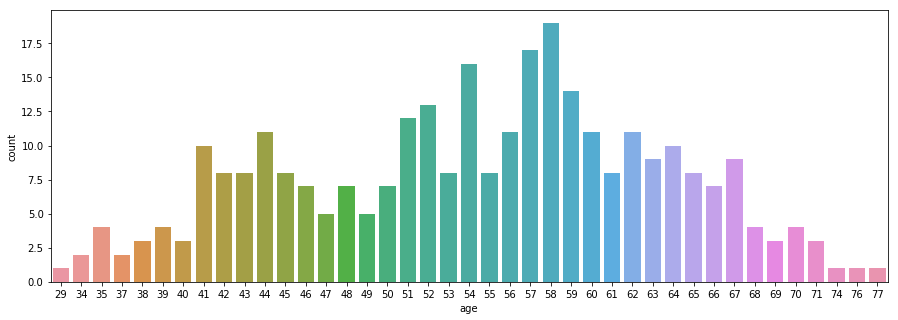

In [33]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(heart_disease['age'])
plt.show()

# 2. Most of Male people getting Heart Disease

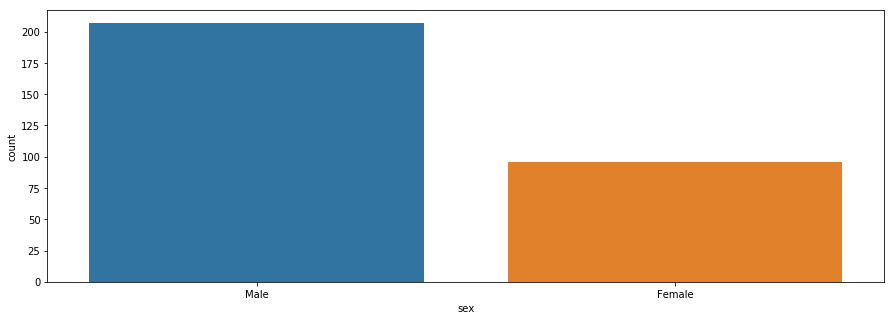

In [34]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(heart_disease['sex'])
plt.show()

# 3. Chest Pain  type is more of Typical Angina

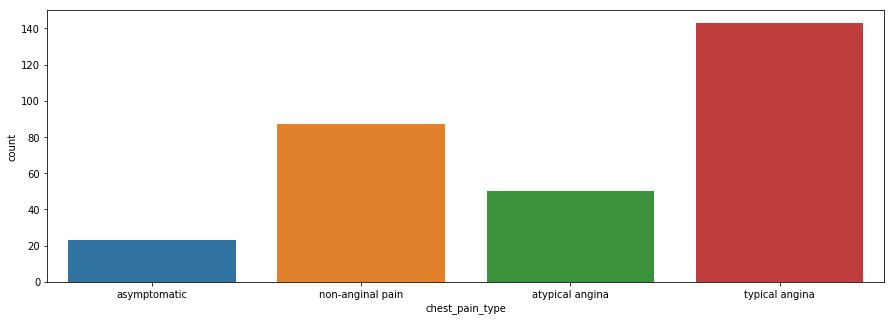

In [35]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(heart_disease['chest_pain_type'])
plt.show()

# 4. Target

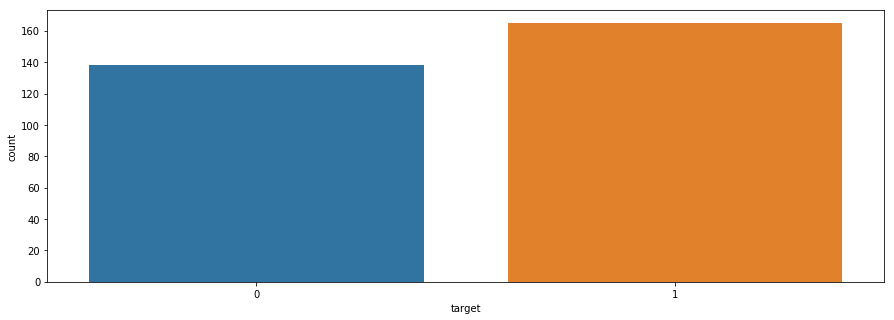

In [36]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(heart_disease['target'])
plt.show()

# 4. Excercise againist Heart Disease

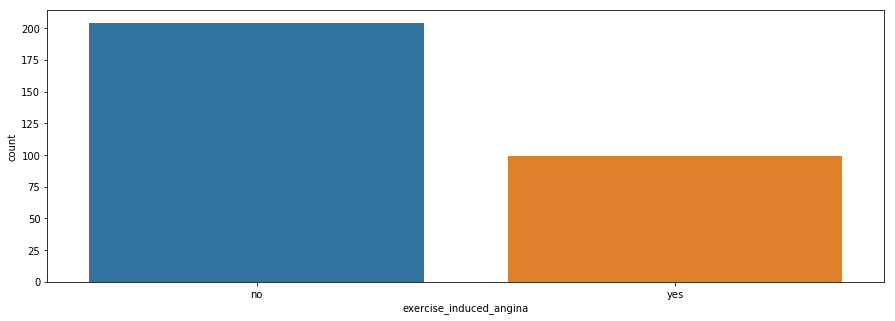

In [37]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(heart_disease['exercise_induced_angina'])
plt.show()

# 6. ECG

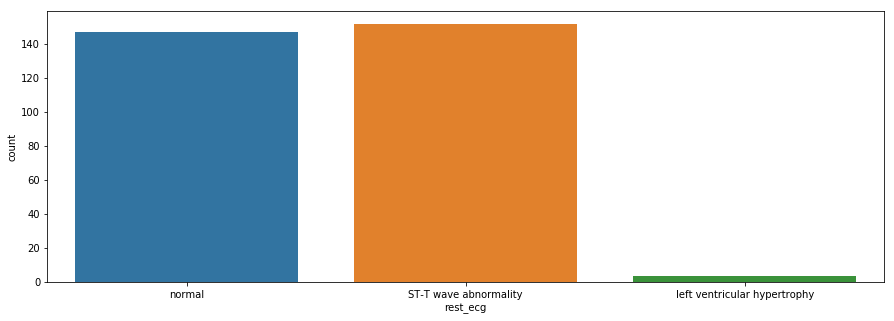

In [38]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(heart_disease['rest_ecg'])
plt.show()

# 7. Slope of Heart Disease

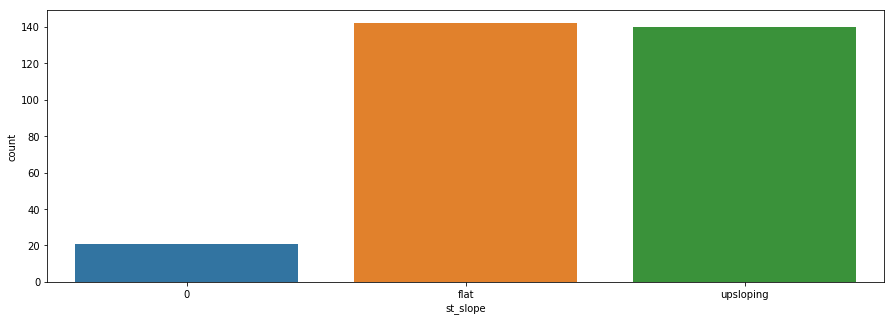

In [39]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(heart_disease['st_slope'])
plt.show()

# 8. Thalassemia

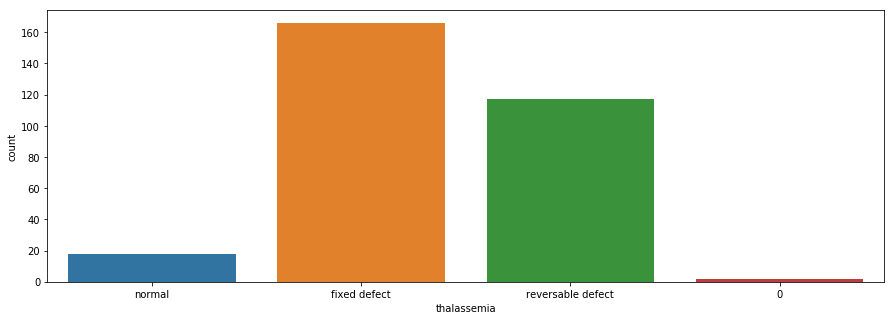

In [40]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(heart_disease['thalassemia'])
plt.show()

# Bivariate Analysis

# 1. Age Vs Sex

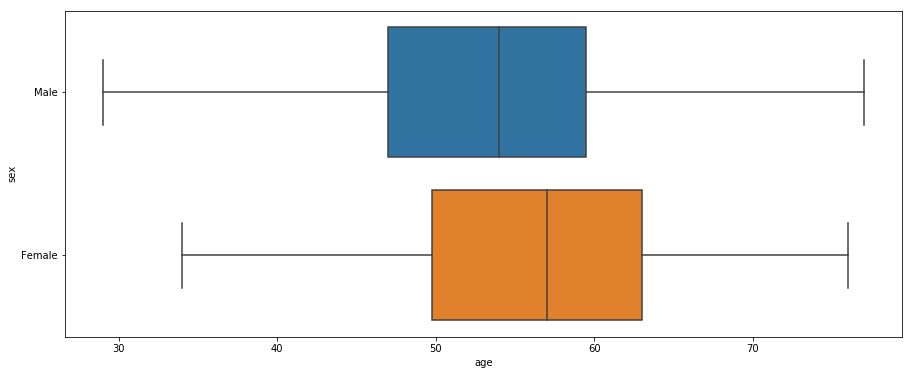

In [41]:
f,ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x='age',y='sex',data=heart_disease)
plt.show()

# 2. Age Vs Chest Pain Type

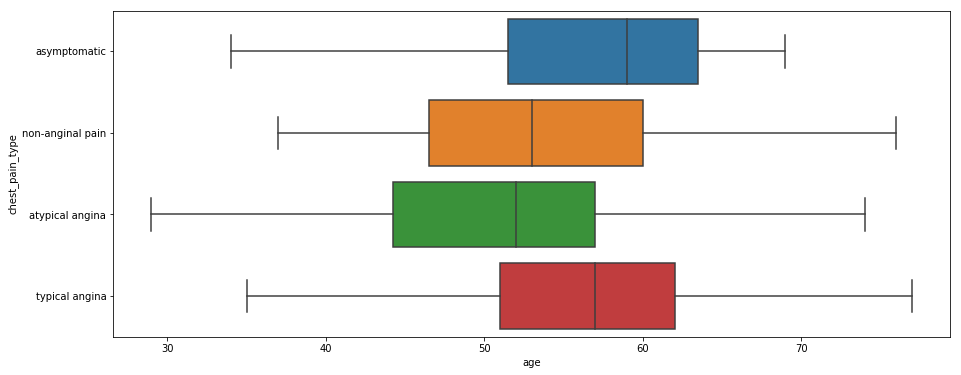

In [42]:
f,ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x='age',y='chest_pain_type',data=heart_disease)
plt.show()

# 3. Sex Vs Heart Rate

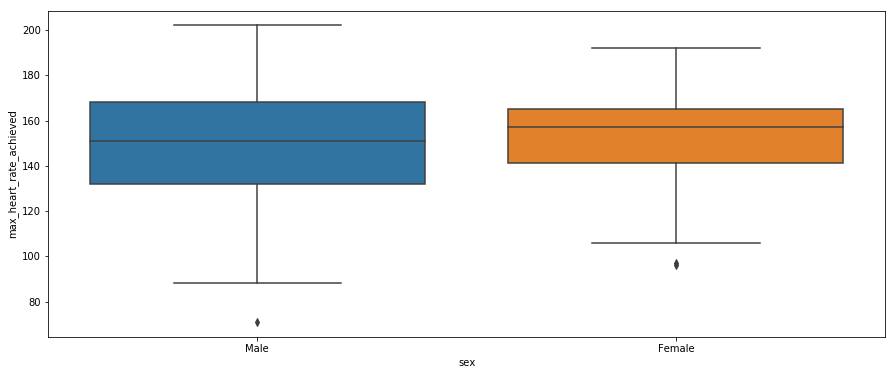

In [43]:
f,ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x='sex',y='max_heart_rate_achieved',data=heart_disease)
plt.show()

# 4. Sex Vs target

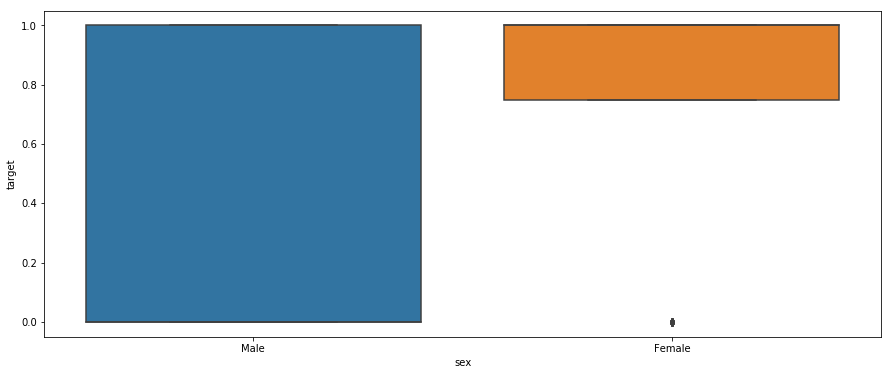

In [44]:
f,ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x='sex',y='target',data=heart_disease)
plt.show()

# 5. Sex Vs Cholestrol

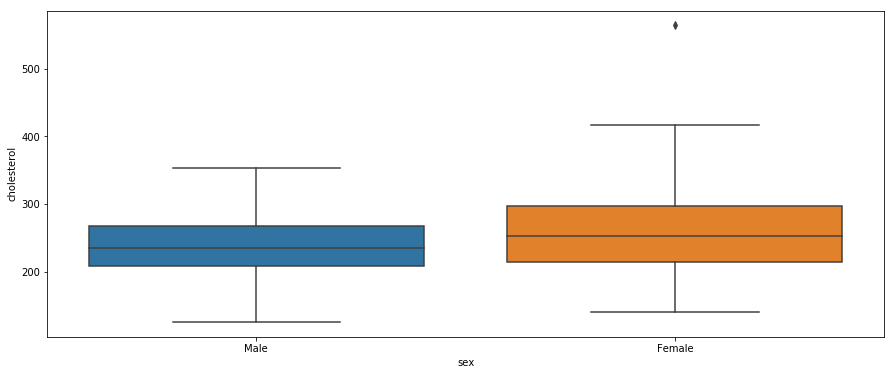

In [45]:
f,ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x='sex',y='cholesterol',data=heart_disease)
plt.show()

# Distribution of the Target

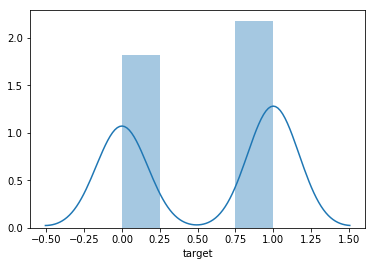

In [46]:
sns.distplot(heart_disease['target'])

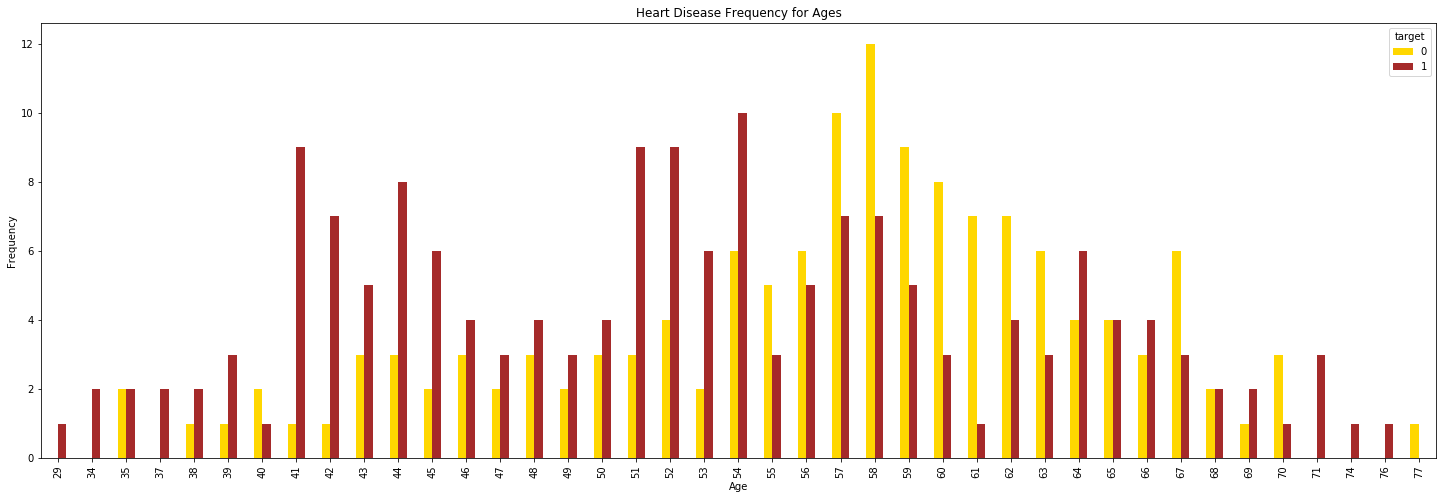

In [47]:
pd.crosstab(heart_disease.age,heart_disease.target).plot(kind="bar",figsize=(25,8),color=['gold','brown' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

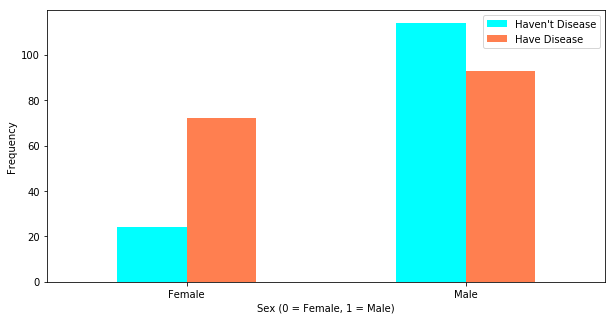

In [48]:
pd.crosstab(heart_disease.sex,heart_disease.target).plot(kind="bar",figsize=(10,5),color=['cyan','coral' ])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

# Pairplot

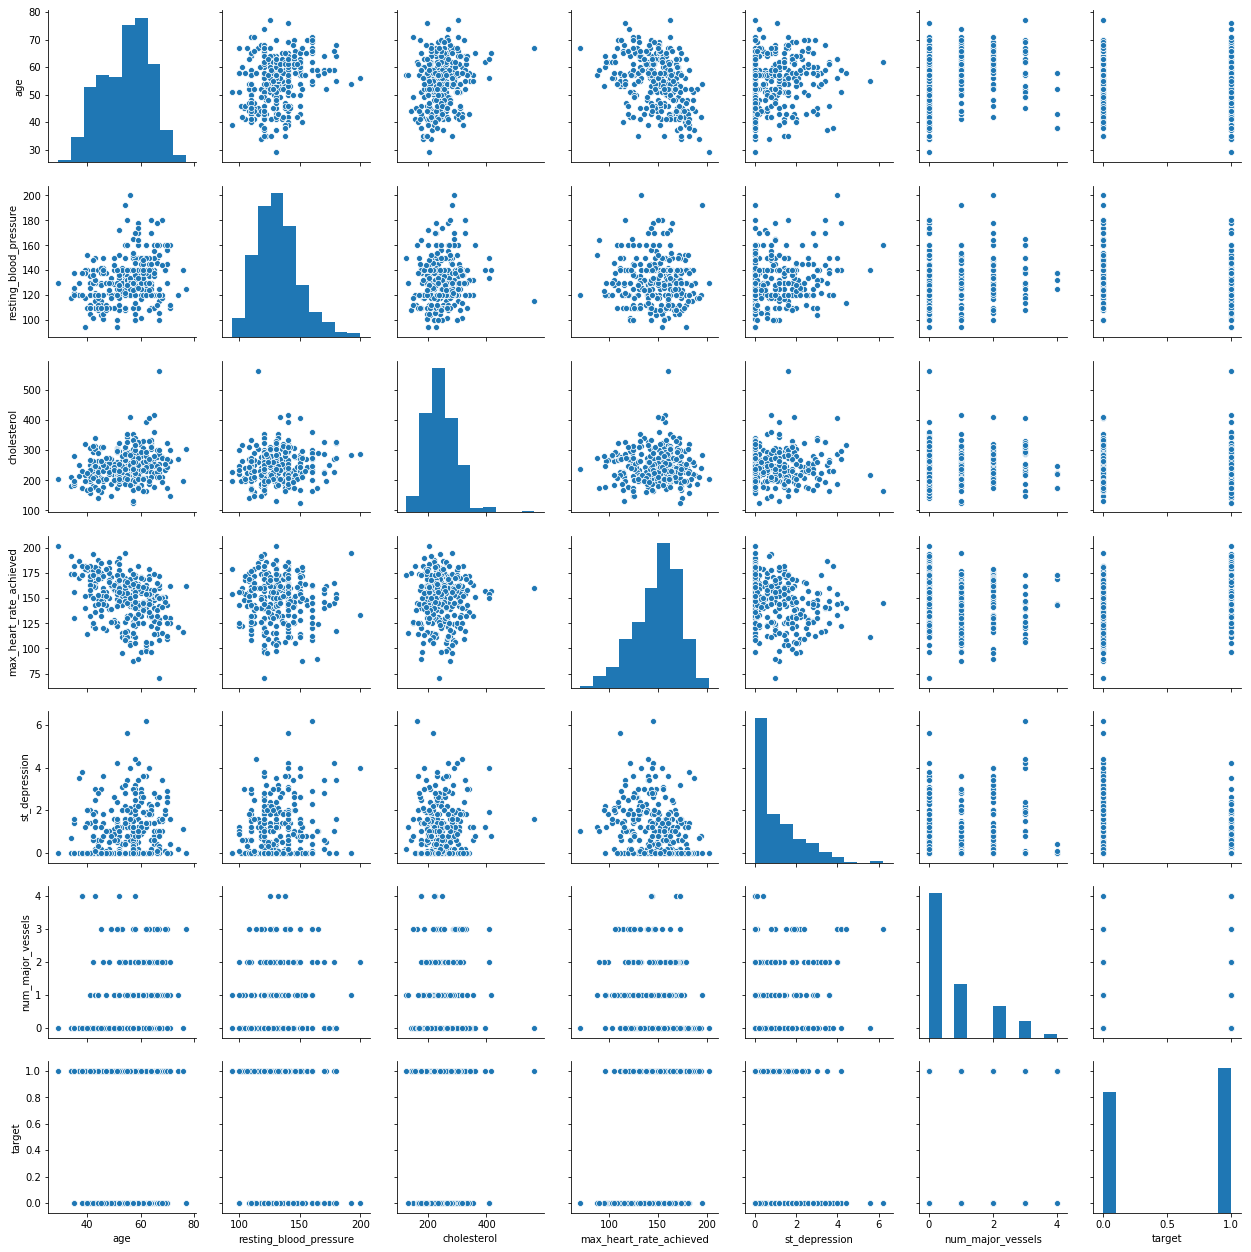

In [49]:
sns.pairplot(data=heart_disease)

# Correlation Diagram

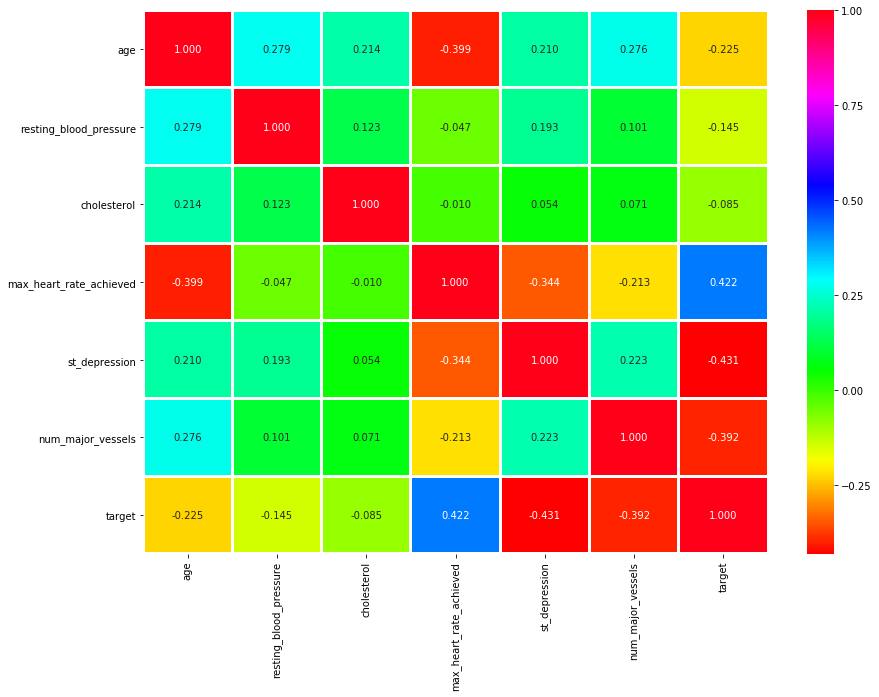

In [50]:
plt.figure(figsize=(14,10))
sns.heatmap(heart_disease.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

# Engineering Featuring

In [51]:
heart_disease.groupby('chest_pain_type', as_index=False)['target'].mean()

,chest_pain_type,target
0,asymptomatic,0.695652
1,atypical angina,0.820000
2,non-anginal pain,0.793103
3,typical angina,0.272727


In [52]:
heart_disease.groupby('st_slope',as_index=False)['target'].mean()

,st_slope,target
0,0,0.428571
1,flat,0.753521
2,upsloping,0.350000


In [53]:
heart_disease.groupby('thalassemia',as_index=False)['target'].mean()

,thalassemia,target
0,0,0.500000
1,fixed defect,0.783133
2,normal,0.333333
3,reversable defect,0.239316


In [54]:
heart_disease.groupby('target').mean()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
target,,,,,,
0,56.601449,134.398551,251.086957,139.101449,1.585507,1.166667
1,52.496970,129.303030,242.230303,158.466667,0.583030,0.363636


# Convert to categorical data using Dummy

In [55]:
# Convert the data into categorical data type
heart_disease.chest_pain_type = heart_disease.chest_pain_type.astype("category")
heart_disease.exercise_induced_angina = heart_disease.exercise_induced_angina.astype("category")
heart_disease.fasting_blood_sugar = heart_disease.fasting_blood_sugar.astype("category")
heart_disease.rest_ecg = heart_disease.rest_ecg.astype("category")
heart_disease.sex = heart_disease.sex.astype("category")
heart_disease.st_slope = heart_disease.st_slope.astype("category")
heart_disease.thalassemia = heart_disease.thalassemia.astype("category")

In [56]:
# Dummy values
heart_disease1 = pd.get_dummies(heart_disease, drop_first=True)

In [57]:
heart_disease1.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_Male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0


# Normalize / Scale the Data

In [58]:
# Import Libraries
from sklearn.preprocessing import scale
scale(heart_disease1)

array([[ 0.9521966 ,  0.76395577, -0.25633371, ..., -1.10076284,
         3.97911213, -0.79311554],
       [-1.91531289, -0.09273778,  0.07219949, ...,  0.9084609 ,
        -0.25131234, -0.79311554],
       [-1.47415758, -0.09273778, -0.81677269, ...,  0.9084609 ,
        -0.25131234, -0.79311554],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , ..., -1.10076284,
        -0.25131234,  1.26085034],
       [ 0.29046364, -0.09273778, -2.2275329 , ..., -1.10076284,
        -0.25131234,  1.26085034],
       [ 0.29046364, -0.09273778, -0.19835726, ...,  0.9084609 ,
        -0.25131234, -0.79311554]])

There is -Ve values in normalized data ,hence we can use exponential of the scaled data

In [59]:
np.exp(scale(heart_disease1))

array([[ 2.59139568,  2.1467515 ,  0.77388367, ...,  0.33261725,
        53.46953908,  0.45243302],
       [ 0.14729574,  0.91143246,  1.07486975, ...,  2.48050185,
         0.7777794 ,  0.45243302],
       [ 0.22897154,  0.91143246,  0.44185536, ...,  2.48050185,
         0.7777794 ,  0.45243302],
       ...,
       [ 4.49803545,  2.0275798 ,  0.35723802, ...,  0.33261725,
         0.7777794 ,  3.52842058],
       [ 1.33704726,  0.91143246,  0.10779404, ...,  0.33261725,
         0.7777794 ,  3.52842058],
       [ 1.33704726,  0.91143246,  0.82007682, ...,  2.48050185,
         0.7777794 ,  0.45243302]])

# Divide the data as input and output

In [60]:
x = heart_disease1.drop(['target'], axis = 1)
y = heart_disease1.target.values

In [61]:
# Input values
x

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_Male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,0,1,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,0,1,0,0,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,0,0,0,1,1,0,0,1,1,0,1,0,0
5,57,140,192,148,0.4,0,1,0,0,1,1,0,0,0,0,1,0,1,0
6,56,140,294,153,1.3,0,0,1,0,0,1,0,1,0,0,1,1,0,0
7,44,120,263,173,0.0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
8,52,172,199,162,0.5,0,1,0,1,0,0,0,0,0,1,0,0,0,1
9,57,150,168,174,1.6,0,1,0,1,0,1,0,0,0,1,0,1,0,0


In [62]:
# Output Values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Split the data as Training and Testing

In [63]:
# Import Libraries
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80)

# Build Machine Learning Models

# 1 . Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [65]:
# Fit the model
logmodel.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
# Predict the model
LR_pred = logmodel.predict(x_test)
LR_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [67]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(LR_pred,y_test))

[[13  6]
 [ 7 35]]


In [68]:
# Accuracy
from sklearn.metrics import accuracy_score
LR_accuracy = accuracy_score(LR_pred,y_test)
LR_accuracy

0.7868852459016393

# Logistic Regression Accuracy Score is : 87%

# 2. K-Nearest Neighbor (KNN)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [70]:
# Fit the Model
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [71]:
# Predict the Model
knn_pred = classifier.predict(x_test)
knn_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [72]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(knn_pred,y_test))

[[13 17]
 [ 7 24]]


In [73]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_knn=accuracy_score(knn_pred,y_test)
accuracy_knn

0.6065573770491803

# KNN Accuracy Score is :65 %

# 3. Naive Bayes Classifier (NBC)

In [74]:
from sklearn.naive_bayes import GaussianNB
classifier2 = GaussianNB()
classifier2

GaussianNB(priors=None, var_smoothing=1e-09)

In [75]:
# Fit the model
classifier2.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [76]:
# Predict the model
NBC_pred = classifier2.predict(x_test)
NBC_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [77]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(NBC_pred,y_test))

[[14  6]
 [ 6 35]]


In [78]:
# Accuracy
from sklearn.metrics import accuracy_score
NBC_accuracy = accuracy_score(NBC_pred,y_test)
NBC_accuracy

0.8032786885245902

# NBC Accuracy Score is : 80%

# 4. Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier1

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [80]:
# Fit the model
classifier1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [81]:
# Predict the model
DT_pred = classifier1.predict(x_test)
DT_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [82]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(DT_pred,y_test))

[[13  8]
 [ 7 33]]


In [83]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_DT = accuracy_score(DT_pred,y_test)
accuracy_DT

0.7540983606557377

# Decision Tree Classifier Accuracy score is : 74%

# 5. Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(criterion='entropy',random_state=0)
classifier3

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [85]:
# Fit the model
classifier3.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [86]:
# Predict the model
RF_pred = classifier3.predict(x_test)
RF_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [87]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(RF_pred,y_test))

[[15  6]
 [ 5 35]]


In [88]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_RF = accuracy_score(RF_pred,y_test)
accuracy_RF

0.819672131147541

# Random Forest Classifier Accuracy score is : 82%

# 6. Support Vector Machine (SVM)

In [89]:
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'linear', random_state = 0)
classifier4

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [90]:
# Fit the model
classifier4.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [91]:
# Predict the model
SVC_pred = classifier4.predict(x_test)
SVC_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [92]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(SVC_pred,y_test))

[[13  6]
 [ 7 35]]


In [93]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_SVC = accuracy_score(SVC_pred,y_test)
accuracy_SVC

0.7868852459016393

# SVM Accuracy Score is : 77%

# 7. GridSearchCV Algorithm

In [94]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier()

In [95]:
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }


In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
classifier5 = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')
classifier5

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [97]:
# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

In [98]:
# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [99]:
# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

In [100]:
# Fit the best algorithm to the data. 
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [101]:
predictions = clf.predict(x_test)
print(accuracy_score(y_test, predictions))

0.819672131147541


# GridSearchCV Accuracy Score is : 81 %

# Accuracy Scores for All ML Models:
# 1. K-Nearest Neighbor : 65 %
# 2. Decision Trees : 74 %
# 3. Support Vector Machine : 77 %
# 4. Naive Bayes Classifier : 80 %
# 5. Random Forest : 82 %
# 6. Logistic Regression : 87 %
# 7. GridSearch CV : 81 %

# We can use Logistic Regression model to predict the heart disease.